<a href="https://colab.research.google.com/github/ADLIN-NITHISHA/MARKETING-ANALYSIS/blob/main/CUSTOMER_SEGMENTATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Test.csv")
df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6,B
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6,A
2,458996,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6,A
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6,B
4,459001,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6,A


PROBLEM:

What is the classifying criteria for the 4 segments and what is the right groups for the new potential customers?

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2627 entries, 0 to 2626
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               2627 non-null   int64  
 1   Gender           2627 non-null   object 
 2   Ever_Married     2577 non-null   object 
 3   Age              2627 non-null   int64  
 4   Graduated        2603 non-null   object 
 5   Profession       2589 non-null   object 
 6   Work_Experience  2358 non-null   float64
 7   Spending_Score   2627 non-null   object 
 8   Family_Size      2514 non-null   float64
 9   Var_1            2595 non-null   object 
 10  Segmentation     2627 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 225.9+ KB


In [ ]:
df=df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2154 entries, 0 to 2626
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               2154 non-null   int64  
 1   Gender           2154 non-null   object 
 2   Ever_Married     2154 non-null   object 
 3   Age              2154 non-null   int64  
 4   Graduated        2154 non-null   object 
 5   Profession       2154 non-null   object 
 6   Work_Experience  2154 non-null   float64
 7   Spending_Score   2154 non-null   object 
 8   Family_Size      2154 non-null   float64
 9   Var_1            2154 non-null   object 
 10  Segmentation     2154 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 201.9+ KB


In [ ]:
bin_edges = [0, 18, 24, 34, 44, 54, 64, 100]
bin_labels = ['Below 18', '19-24', '25-34', '35-44', '45-54', '55-64', '65 and above']

df.loc[:,'Age_Groups'] = pd.cut(df['Age'], bins=bin_edges, labels=bin_labels, right=False)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2154 entries, 0 to 2626
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   ID               2154 non-null   int64   
 1   Gender           2154 non-null   object  
 2   Ever_Married     2154 non-null   int64   
 3   Age              2154 non-null   int64   
 4   Graduated        2154 non-null   int64   
 5   Profession       2154 non-null   object  
 6   Work_Experience  2154 non-null   float64 
 7   Spending_Score   2154 non-null   object  
 8   Family_Size      2154 non-null   float64 
 9   Var_1            2154 non-null   object  
 10  Segmentation     2154 non-null   object  
 11  Age_Groups       2154 non-null   category
dtypes: category(1), float64(2), int64(4), object(5)
memory usage: 204.4+ KB


EXPLORATORY DATA ANALYSIS:

In [ ]:
def plot_stacked_barplots(df, column1, column2, title):
    grouped = df.groupby([column1, column2]).size().unstack()
    ax = grouped.plot(kind='bar', stacked='True', edgecolor='black')

    ax.legend(loc='upper left', bbox_to_anchor=(1,1))

    plt.xlabel(column1)
    plt.ylabel('Count')
    plt.title(title)
    plt.show()

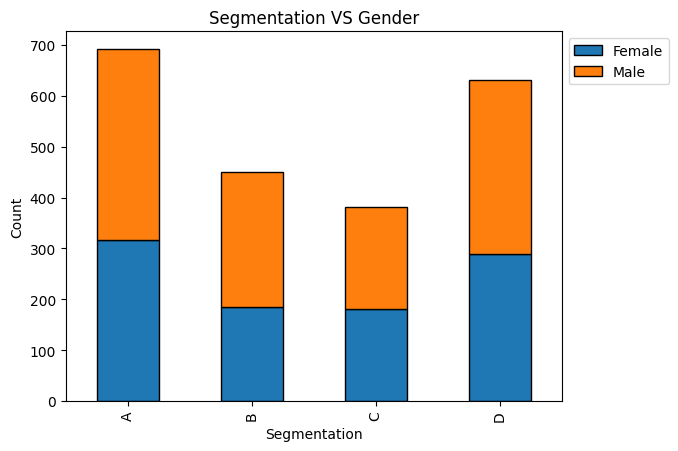

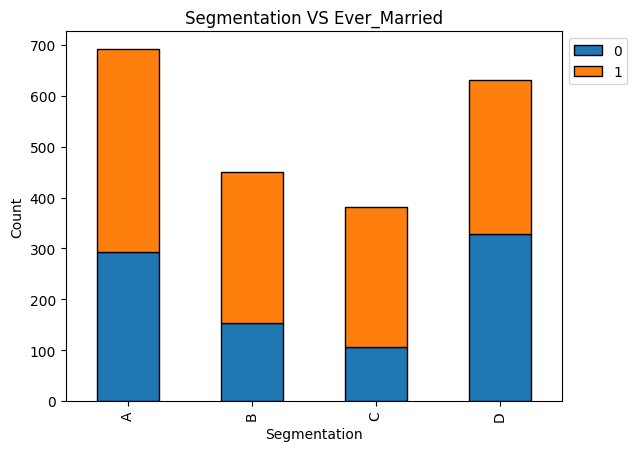

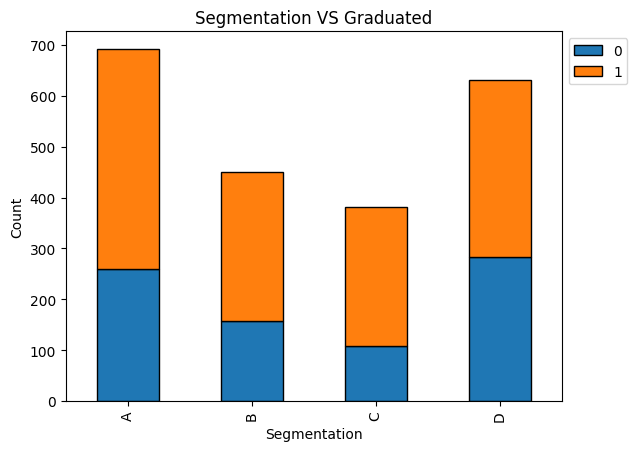

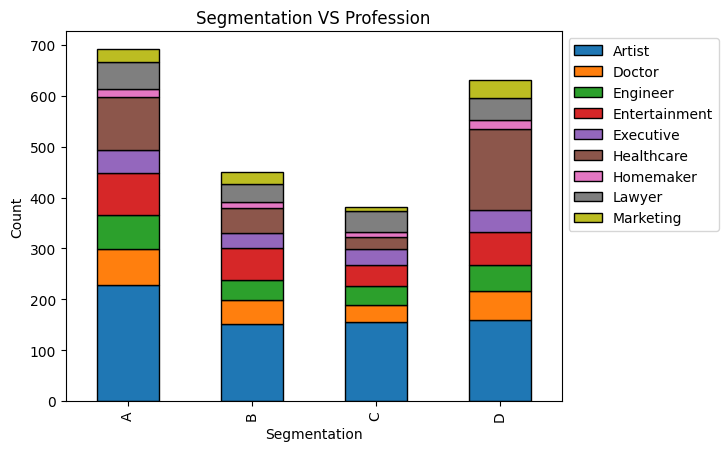

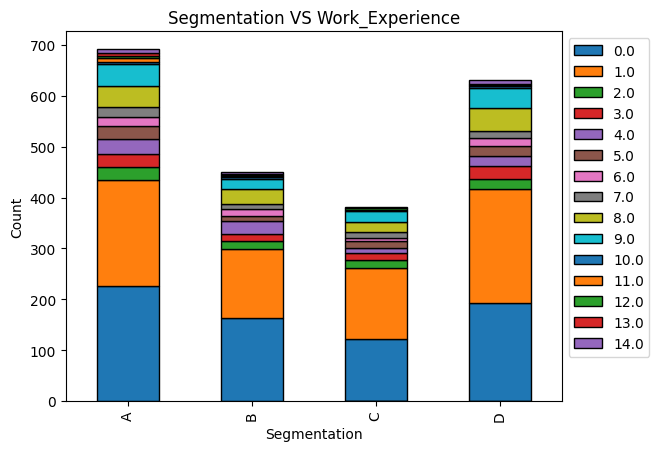

In [ ]:
plot_stacked_barplots(df, 'Segmentation', 'Gender', 'Segmentation VS Gender')
plot_stacked_barplots(df, 'Segmentation', 'Ever_Married', 'Segmentation VS Ever_Married')
plot_stacked_barplots(df, 'Segmentation', 'Graduated', 'Segmentation VS Graduated')
plot_stacked_barplots(df, 'Segmentation', 'Profession', 'Segmentation VS Profession')
plot_stacked_barplots(df, 'Segmentation', 'Work_Experience', 'Segmentation VS Work_Experience')

DATA PREPROCESSING:

Data preprocessing is a crucial step in model building, involving tasks like handling missing values, scaling features, and encoding categorical variables. This ensures the data is clean, standardized, and ready for effective modeling, ultimately enhancing the performance and accuracy of machine learning algorithms.



In [ ]:
binary_columns = ['Ever_Married', 'Graduated']
df[binary_columns] = df[binary_columns].replace({'Yes':1, 'No':0})

In [ ]:
columns_to_encode = ['Gender', 'Profession', 'Spending_Score', 'Var_1', 'Segmentation', 'Age_Groups']
df_encoded = pd.get_dummies(df, columns=columns_to_encode, prefix=columns_to_encode)

In [ ]:
df_encoded.head()

,ID,Ever_Married,Age,Graduated,Work_Experience,Family_Size,Gender_Female,Gender_Male,Profession_Artist,Profession_Doctor,...,Segmentation_B,Segmentation_C,Segmentation_D,Age_Groups_Below 18,Age_Groups_19-24,Age_Groups_25-34,Age_Groups_35-44,Age_Groups_45-54,Age_Groups_55-64,Age_Groups_65 and above
0,458989,1,36,1,0.0,1.0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
1,458994,1,37,1,8.0,4.0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,459000,1,59,0,11.0,2.0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
5,459003,1,47,1,0.0,5.0,0,1,0,1,...,0,1,0,0,0,0,0,1,0,0
6,459005,1,61,1,5.0,3.0,0,1,0,1,...,0,0,1,0,0,0,0,0,1,0


In [ ]:
columns_to_drop = ['ID', 'Age']
df_encoded_dropped = df_encoded.drop(columns=columns_to_drop, axis=1)
target_columns = ['Segmentation_A', 'Segmentation_B', 'Segmentation_C', 'Segmentation_D']

In [ ]:
x_train = df_encoded_dropped.drop(columns=target_columns)
x_test = df_encoded_dropped.drop(columns=target_columns)
y_train = df_encoded_dropped[target_columns]
y_test = df_encoded_dropped[target_columns]

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

RANDOM FOREST CLASSIFIER:

In [ ]:
rf_classifier = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=0)
rf_classifier.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=0)

In [ ]:
y_pred = rf_classifier.predict(x_test)

In [ ]:
y_pred_df = pd.DataFrame(y_pred, columns=target_columns)

In [ ]:
accuracy = accuracy_score(y_test, y_pred_df)
print('Classification Report:')
print(classification_report(y_test, y_pred_df, zero_division=1))
print(f"Accuracy of model: {accuracy}")

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.80      0.87       692
           1       0.94      0.76      0.84       450
           2       0.93      0.78      0.85       381
           3       0.93      0.82      0.88       631

   micro avg       0.94      0.80      0.86      2154
   macro avg       0.94      0.79      0.86      2154
weighted avg       0.94      0.80      0.86      2154
 samples avg       0.95      0.80      0.80      2154

Accuracy of model: 0.7966573816155988


INTERPRETATION:

An automobile company has plans to enter new markets with their existing products (P1, P2, P3, P4, and P5). After intensive market research, they’ve deduced that the behavior of the new market is similar to their existing market.

In their existing market, the sales team has classified all customers into 4 segments (A, B, C, D ). Then, they performed segmented outreach and communication for a different segment of customers. This strategy has worked exceptionally well for them. They plan to use the same strategy for the new markets and have identified 2627 new potential customers.

I am required to help the manager to predict the right group of the new customers.

The model exhibits an overall accuracy of 79.07%, demonstrating its effectiveness in correctly predicting customer segmentation.


